In [ ]:
from google.colab import drive
from PIL import Image
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


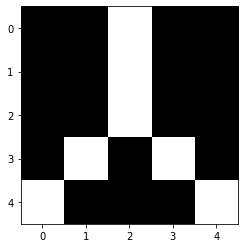

(5, 5)


In [ ]:
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/man.png'
test_img = Image.open(path)
test_img = test_img.resize((5,5))
test_img = test_img.convert('L')
plt.imshow(test_img, cmap = 'gray')
plt.show()
test_x_man = np.array(test_img, np.float32)
print(test_x_man.shape)
test_x_man = test_x_man.reshape(-1,25)
test_x_man = test_x_man / 255

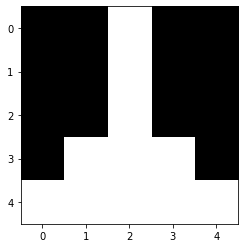

In [ ]:
import matplotlib.pyplot as plt

path = '/content/drive/My Drive/woman.png'
test_img = Image.open(path)
test_img = test_img.resize((5,5))
test_img = test_img.convert('L')
plt.imshow(test_img, cmap = 'gray')
plt.show()

test_x_woman = np.array(test_img, np.float32)
test_x_woman = test_x_woman.reshape(-1,25)
test_x_woman = test_x_woman / 255

In [ ]:
test_x_man = [a for b in test_x_man for a in b]
test_x_woman = [a for b in test_x_woman for a in b]

In [ ]:
inputs = np.array([test_x_man, test_x_woman])
trues = np.array([1, 0])
print(inputs)

[[0.         0.         0.29803923 0.         0.         0.
  0.         0.29803923 0.         0.         0.         0.
  0.29803923 0.         0.         0.         0.29803923 0.
  0.29803923 0.         0.29803923 0.         0.         0.
  0.29803923]
 [0.         0.         0.29803923 0.         0.         0.
  0.         0.29803923 0.         0.         0.         0.
  0.29803923 0.         0.         0.         0.29803923 0.29803923
  0.29803923 0.         0.29803923 0.29803923 0.29803923 0.29803923
  0.29803923]]


In [ ]:
from random import seed
from random import random

def initialize_network(n_inputs, n_hidden, n_outputs):
	network = list()
	hidden_layer = [{'weights':[random() for i in range(n_inputs + 1)]} for i in range(n_hidden)]
	network.append(hidden_layer)
	output_layer = [{'weights':[random() for i in range(n_hidden + 1)]} for i in range(n_outputs)]
	network.append(output_layer)
	return network

network = initialize_network(25, 1, 1)
for layer in network:
	print(layer)

[{'weights': [0.5319654911655066, 0.028009449509481033, 0.24456780230178643, 0.08665265385501986, 0.36269888779641735, 0.11033090890825492, 0.23020509057298588, 0.4971580061222114, 0.7016473577302812, 0.5923066370618786, 0.9750500037807154, 0.7033510057167842, 0.3843217015624597, 0.9643377566207783, 0.938044945216246, 0.7666382408988887, 0.1751217485177723, 0.818393299863334, 0.5301073226663996, 0.3073684952230362, 0.4427922537383525, 0.14929644609133041, 0.8574244453388841, 0.07740492720599068, 0.17657456499988655, 0.9623579526348868]}]
[{'weights': [0.8826282334189249, 0.606625524503779]}]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LinearNeuralNetwork(object):
    def __init__(self, data, label,learing_rate,epoch):
        self.data = data
        self.label = label
        self.learning_rate = learing_rate
        self.W = (np.random.random(data.shape[1]) - 0.5) * 2
        self.output = 0
        self.epoch=epoch
        
        
    # Обновить вес
    def update(self, data, label):
        self.output = np.dot(data, self.W.T)
        # После усреднения сходимость быстрее
        delta_W = self.learning_rate * ((label - (self.output).T).dot(data)) 
        self.W += delta_W
        #self.output = np.sign(np.dot(self.W, data))
    #подготовка
    def fit(self, data, label):
        n = 0
        while n<self.epoch:
            self.update(data, label)
            o=np.sign(np.dot(data, self.W.T))# Формула неверна, это должны быть данные * W, а не W * данные. Результат другой
            n += 1
        print("epochs:", n)
        print(self.W)
        print("output：")
        print(o)
        return
    # Набрать вес
    def getW(self):
        return self.W
    # предсказание
    def predict(self, testData):
        return np.sign(np.dot(self.W, testData))
if __name__ == '__main__':
    #Входные данные
    X = inputs
    #этикетка
    Y = trues
    LNN=LinearNeuralNetwork(X,Y,0.11,10000)
    LNN.fit(X,Y)
    print(LNN.predict(test_x_man))
    print(LNN.predict(test_x_woman))

epochs: 10000
[ 0.17869542 -0.60379869  0.32222041 -0.40819248 -0.92488465 -0.93863032
 -0.09379     0.93971205  0.11459081 -0.2297728  -0.6638544   0.67652264
  0.64808749  0.56542964  0.69701836  0.20632595  1.01210513 -0.64303934
 -0.50768572  0.50092922 -0.19793183 -0.95748468 -0.84826768 -0.90647132
  1.13875549]
output：
[1. 1.]
1.0
1.0


In [ ]:
network = OurNeuralNetwork()

[0.28909420380393497, -0.5398790713327012, 0.7081600199266035, 0.8422247383826557, 0.20358079732747866, 2.3947036648845352, 0.9174589375104293, -0.11227247119416003, -0.36218044714224007, -0.23218225594409092, -0.5017288995948672, 1.1287851531098774, -0.6978100304717146, -0.08112218381694614, -0.5292960809994882, 1.0461828568082643, -1.4185560292233947, -0.3624991831556408, -0.1219056911618885, 0.319356421091224, 0.4609029016717183, -0.21578989233052187, 0.9890724574994391, 0.3147537788117336, 2.467651056434603]
25
